<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/datasets/insurance.csv')
display(df.shape)
display(df.describe())
display(df.info())
display(df.head(10))

(5000, 5)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


Это задача регрессии.

Целевым признаком является столбец **Страховые выплаты**.

Остальные признаки помогут предсказывать решение по столбцу **Страховые выплаты**.

Данные чистые - нулевых значений нет.  
Пол представлен численными значениями.  
возраст в целом можно перевести в integer.

In [3]:
df['Страховые выплаты'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

In [4]:
df['Возраст'].value_counts()

19.0    223
25.0    214
31.0    212
26.0    211
27.0    209
22.0    209
32.0    206
28.0    204
29.0    203
30.0    202
23.0    202
21.0    200
20.0    195
36.0    193
33.0    191
24.0    182
35.0    179
34.0    177
37.0    147
39.0    141
38.0    139
41.0    129
18.0    117
40.0    114
42.0     93
43.0     77
44.0     74
45.0     73
46.0     60
47.0     47
49.0     37
50.0     27
48.0     26
52.0     22
51.0     21
53.0     11
55.0      9
54.0      7
56.0      5
59.0      3
60.0      2
58.0      2
57.0      2
65.0      1
61.0      1
62.0      1
Name: Возраст, dtype: int64

In [5]:
df['Возраст'] = df['Возраст'].astype('int64')

In [6]:
df.dtypes

Пол                    int64
Возраст                int64
Зарплата             float64
Члены семьи            int64
Страховые выплаты      int64
dtype: object

На последок проверим дубликаты

In [7]:
df.duplicated().sum()

153

In [8]:
df.drop_duplicates(inplace=True)

array([[<AxesSubplot:xlabel='Пол', ylabel='Пол'>,
        <AxesSubplot:xlabel='Возраст', ylabel='Пол'>,
        <AxesSubplot:xlabel='Зарплата', ylabel='Пол'>,
        <AxesSubplot:xlabel='Члены семьи', ylabel='Пол'>,
        <AxesSubplot:xlabel='Страховые выплаты', ylabel='Пол'>],
       [<AxesSubplot:xlabel='Пол', ylabel='Возраст'>,
        <AxesSubplot:xlabel='Возраст', ylabel='Возраст'>,
        <AxesSubplot:xlabel='Зарплата', ylabel='Возраст'>,
        <AxesSubplot:xlabel='Члены семьи', ylabel='Возраст'>,
        <AxesSubplot:xlabel='Страховые выплаты', ylabel='Возраст'>],
       [<AxesSubplot:xlabel='Пол', ylabel='Зарплата'>,
        <AxesSubplot:xlabel='Возраст', ylabel='Зарплата'>,
        <AxesSubplot:xlabel='Зарплата', ylabel='Зарплата'>,
        <AxesSubplot:xlabel='Члены семьи', ylabel='Зарплата'>,
        <AxesSubplot:xlabel='Страховые выплаты', ylabel='Зарплата'>],
       [<AxesSubplot:xlabel='Пол', ylabel='Члены семьи'>,
        <AxesSubplot:xlabel='Возраст', ylabel='Член

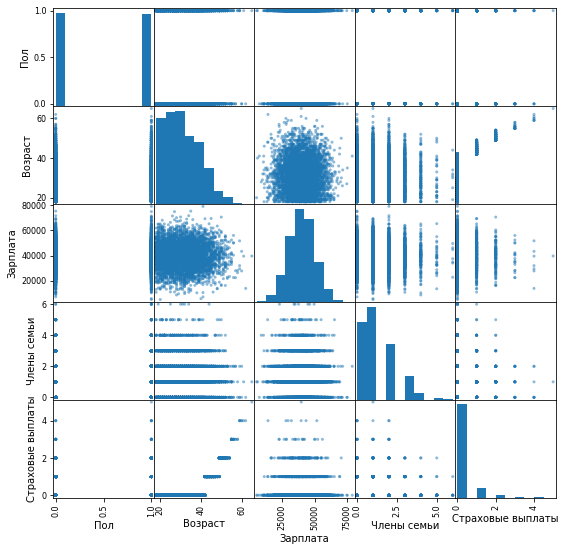

In [9]:
pd.plotting.scatter_matrix(df, figsize=(9, 9))

In [10]:
df.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.001953,0.015456,-0.007315,0.011565
Возраст,0.001953,1.000000,-0.017386,-0.009064,0.654964
Зарплата,0.015456,-0.017386,1.000000,-0.031687,-0.013123
Члены семьи,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
Страховые выплаты,0.011565,0.654964,-0.013123,-0.039303,1.000000


По графику и таблице корреляций видна взаимосвязь между возрастом и страховыми выплатами, остальные особо не коррелируются, либо если и есть связь, то нелинейная.



<div class="alert alert-success" style="border-color: green; border-radius: 5px">
Еще можно использовать функцию pairplot из библиотеки seaborn - то же самое, но добавит эстетики  👌
    
https://seaborn.pydata.org/generated/seaborn.pairplot.html
</div>

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** При умножении на обратимую матрицу, качество линейной регресии не изменится.

**Обоснование:** 

Представим новую матрицу признаков $X1$  как произведение старой $X$ на матрицу $P$ (обратимую):

$$X1 = X*P$$

Подставим новое значение $X1$ в формулу $w1$ :

$$w1 = ((XP)^T XP)^{-1} XP^T y$$

Раскроем произведение $(XP)^T$:

$$w1 = (P^T X^T XP)^{-1} P^T X^T y$$

Имея ввиду $ X^T X$ как единый множитель, раскроем скобки:

$$w1 = P^{-1}(X^T X)^{-1}(P^T)^{-1}P^T X^T y $$

Так как по условию $P$ является обратимой, то произведение $(P^T)^{-1}P^T$ равно $E$ (единичная матрица):

$$w1 = P^{-1}(X^T X)^{-1}E X^T y $$

Помня чему равняется $w$ уравнение можно привести к виду:

$$w1 = P^{-1}w $$

Подставим новое значение весов $𝑤1$ в формулу для предсказаний линейной регрессии.

$$a1 = XP w1 = XP P^{-1}w$$

$PP^{-1} = E$ единичной матрице, поэтому:

$$a1 = XEw = Xw =a$$

Мы доказали, что предсказания для матрицы признаков, умноженной на обратимую матрицу равны исходным предсказаниям. Следовательно, при умножении признаков на обратимую матрицу - качество линейной регрессии не изменится. В данном случае, параметры линейной регрессии в исходной задаче и в преобразованной связаны следующим образом:

$$w1 = P^{-1}w $$

## Алгоритм преобразования

**Алгоритм**

* Возьмем рандомную матрицу
* проверим ее на обратимость
* зафиксируем ее random seed, чтобы она не менялась
* умножим ее на признаки
* Найдем метрики обученной модели на исходных признаках и на признаках умноженных на нашу матрицу (r2_score)
* Сравнить метрики между собой

**Обоснование**

Новая рандомная матрица должна иметь необходимую размерность n*n, где n - количество признаков для регрессии.  
Матрица является обратимой (т.е. имеет обратную матрицу) только для квадратных матриц.

## Проверка алгоритма

In [11]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [12]:
features.shape #значит ширина =4 и длина у новой матрицы должна быть = 4

(4847, 4)

In [13]:
np.random.seed(12345)
n = features.shape[1]
matrix = np.random.normal(size = (n,n)) #обратимая д.б. квадратной

In [14]:
np.linalg.inv(matrix)

array([[-1.31136747,  0.3921804 ,  0.18868055, -0.67088287],
       [ 1.75872714,  0.14106138, -0.17773045,  0.79787127],
       [-0.41702659, -0.22854768,  0.3550602 ,  0.33039819],
       [ 0.58912996,  0.19073027, -0.5545481 ,  0.6259302 ]])

<div class="alert alert-warning" style="border-color: orange; border-radius: 5px">
    
Для реализации проверки можно также использовать конструкции try-except или if-else. С их помощью также реализовать создание до тех пор, пока не получится нужная нам обратная матрица.
    
Проверить матрицу на обратимость:  
    
    * проверить умножение матрицы на обратную, чтобы получилась единичная матрица
    * чтобы определитель был не равен 0
</div>

Обратная существует, значит она обратимая

***

In [15]:
model = LinearRegression()
model.fit(features, target)
predictions1 = model.predict(features)
r2_score1 = r2_score(target, predictions1)
mse1 = mean_squared_error(target, predictions1)
print('MSE на исходных признаках:', mse1)
print('R2 на исходных признаках:', r2_score1)

MSE на исходных признаках: 0.12527263826681606
R2 на исходных признаках: 0.4302010044852066


In [16]:
features_new = features.dot(matrix)

In [17]:
#model = LinearRegression()
model.fit(features_new, target)
predictions2 = model.predict(features_new)
r2_score2 = r2_score(target, predictions2)
mse2 = mean_squared_error(target, predictions2)
print('MSE на новых признаках:', mse1)
print('R2 на новых признаках:', r2_score2)

MSE на новых признаках: 0.12527263826681606
R2 на новых признаках: 0.43020100448521015


In [18]:
r2_score1 - r2_score2
# так мы можем оценить порядок ошибки, а значит и качество модели.

-3.552713678800501e-15

Качество линейной регрессии практически не изменилось, поэтому можно сказать, что алгоритм преобразования данных работает правильно.

In [19]:
features.head(10)
# данные ДО

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0
5,1,43,41000.0,2
6,1,39,39700.0,2
7,1,25,38600.0,4
8,1,36,49700.0,1
9,1,32,51700.0,1


In [20]:
features_new.head(10)
# данные ПОСЛЕ

,0,1,2,3
0,38224.186641,61881.000420,49961.234837,-64280.684721
1,29313.558467,47428.845564,38278.822267,-49242.555394
2,16206.481556,26215.538233,21153.670838,-27212.472653
3,32110.072445,52006.047856,42004.453110,-54044.730722
4,20126.326163,32571.440926,26289.724215,-33824.037786
5,31614.799112,51164.677412,41300.945095,-53131.733261
6,30607.206652,49538.738631,39991.227298,-51447.772803
7,29734.310883,48148.610565,38884.724128,-50024.101171
8,38291.259995,61998.676865,50061.489234,-64411.715562
9,39821.442008,64485.972714,52075.496317,-67005.284765


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования